In [ ]:
# Day7 Assignment Batch1 AIML  - 14/7/2020
# Venkkatesh V R 
# Attrition Project

# Case Study

Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


In [232]:
# importing libraries

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

%matplotlib inline

In [233]:
# Load the Dataset

data = pd.read_csv('general_data.csv')

In [234]:
# First look

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [235]:
# Shape of the data
data.shape

(4410, 24)

In [236]:
#columns of data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Variable Identification and Typecasting

In [237]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

### Numeric Data Type

In [239]:
# Identifying variables with integer datatype
ndata = data.select_dtypes(include=['int64','float64'])
ndata.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Object Data Type

In [240]:
# Identifying variables with Categorical datatype
cdata = data.select_dtypes(include='object')
cdata.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

## Univariate Analysis: Numerical Variables

In [241]:
ncols = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
ndata = data[ncols]


### Describe Function

In [242]:
ndata.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [243]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data):
  # calculating descriptives of variable
    mini = data.min().to_frame(name='minimum')
    maxi = data.max().to_frame(name='maximum')
    ran = data.max()-data.min()
    mean = data.mean().to_frame(name='mean')
    median = data.median().to_frame(name='median')
    #mode = data.mode()[0].to_frame(name='mode')
    st_dev = data.std().to_frame(name='std-devaition')
    var = data.var().to_frame(name='variance')
    skew = data.skew().to_frame(name='skewness')
    kurt = data.kurtosis().to_frame(name='kurtosis')

    df = pd.concat([mini,maxi,mean,median,st_dev,var,skew,kurt],axis=1)
    return df

In [244]:
ndf = UVA_numeric(ndata)
ndf

,minimum,maximum,mean,median,std-devaition,variance,skewness,kurtosis
Age,18.0,60.0,36.923810,36.0,9.133301,8.341719e+01,0.413005,-0.405951
DistanceFromHome,1.0,29.0,9.192517,7.0,8.105026,6.569144e+01,0.957466,-0.227045
Education,1.0,5.0,2.912925,3.0,1.023933,1.048438e+00,-0.289484,-0.560569
JobLevel,1.0,5.0,2.063946,2.0,1.106689,1.224760e+00,1.024703,0.395525
MonthlyIncome,10090.0,199990.0,65029.312925,49190.0,47068.888559,2.215480e+09,1.368884,1.000232
NumCompaniesWorked,0.0,9.0,2.694830,2.0,2.498887,6.244436e+00,1.026767,0.007287
PercentSalaryHike,11.0,25.0,15.209524,14.0,3.659108,1.338907e+01,0.820569,-0.302638
TotalWorkingYears,0.0,40.0,11.279936,10.0,7.782222,6.056298e+01,1.116832,0.912936
TrainingTimesLastYear,0.0,6.0,2.799320,3.0,1.288978,1.661465e+00,0.552748,0.491149
YearsAtCompany,0.0,40.0,7.008163,5.0,6.125135,3.751728e+01,1.763328,3.923864


### Distribution of Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2AE4228C8>,
      dtype=object)

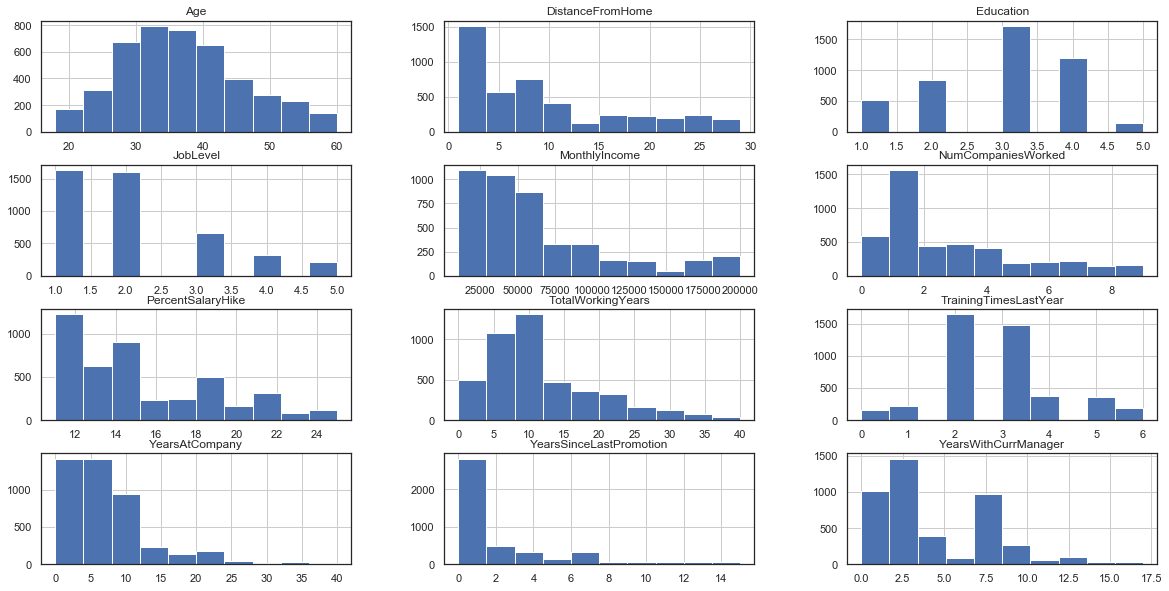

In [245]:
ndata.hist(figsize = (20,10))

## Univariate Analysis : Categorical Varibales

In [246]:
categorical_cols = data.select_dtypes(exclude=['int64','float64','Int64']).columns

# checking
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [247]:
data[categorical_cols].mode()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y


### Distributions of Categorical Variables (Discrete Variables)

In [248]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (8*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.yticks(rotation=30)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

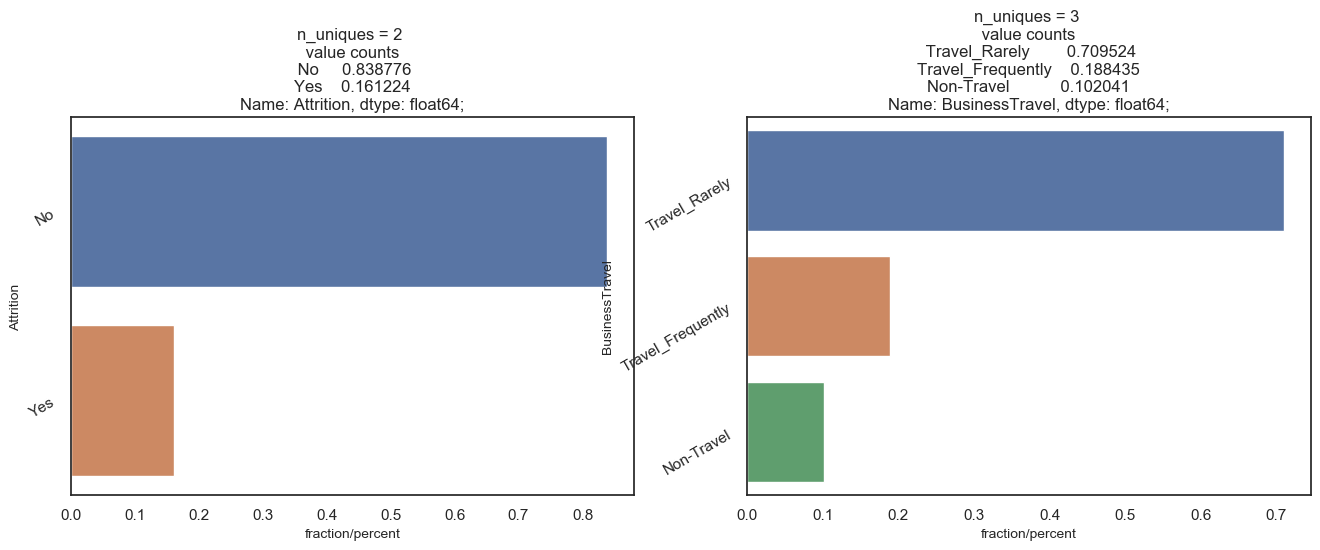

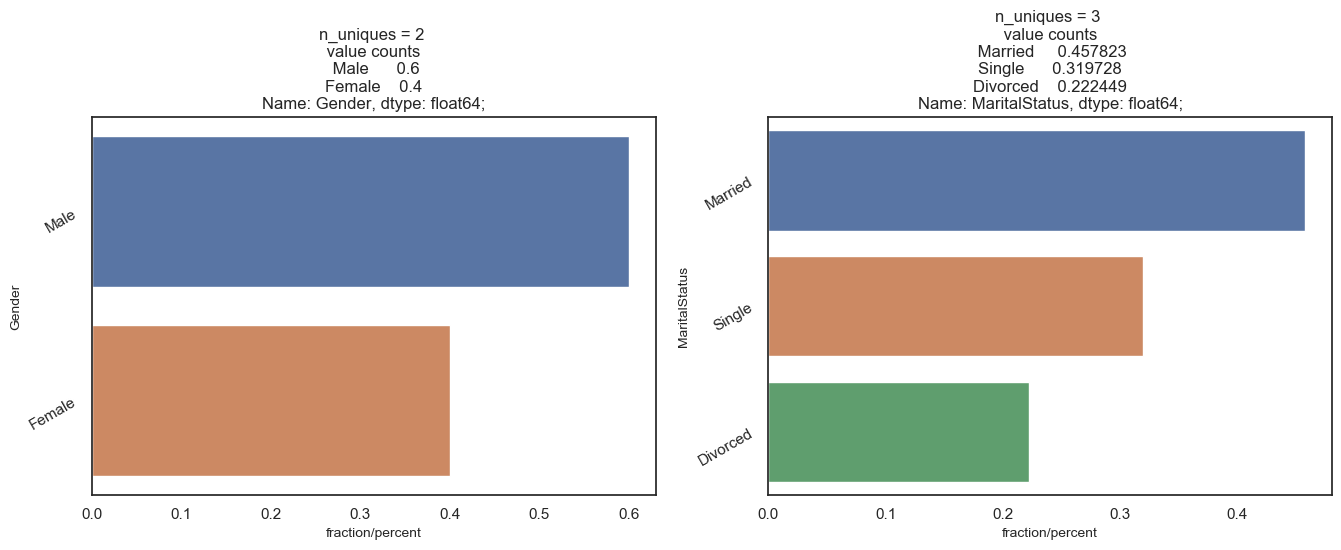

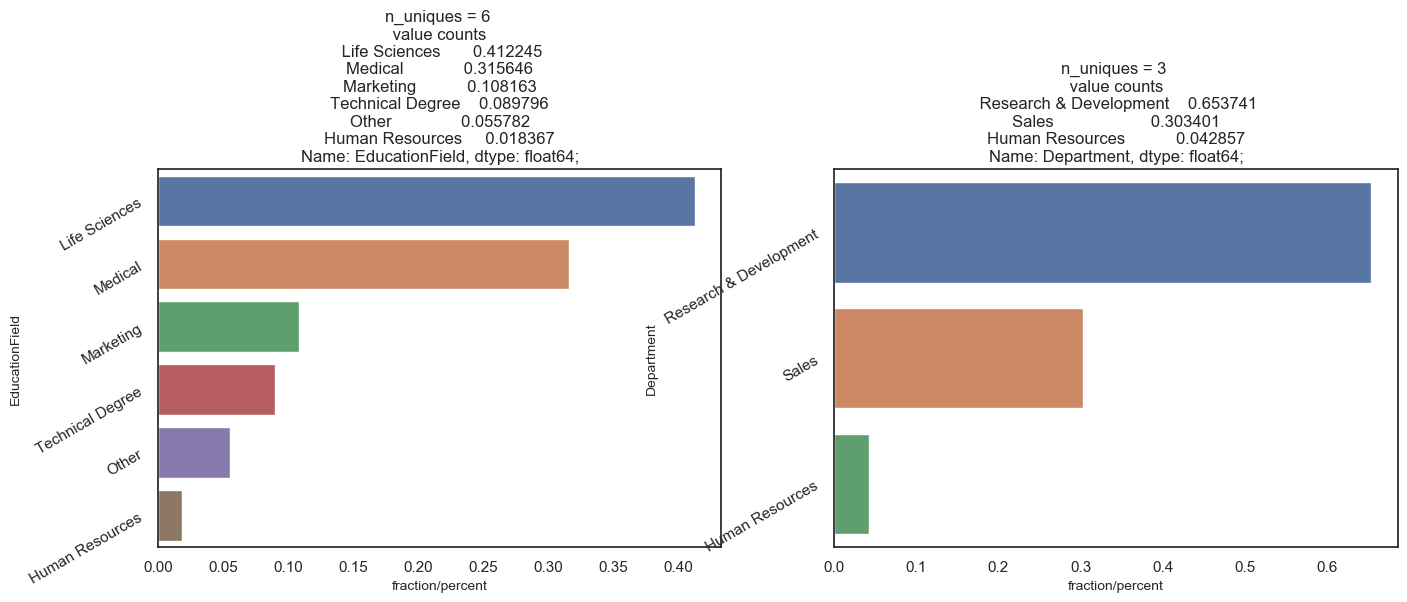

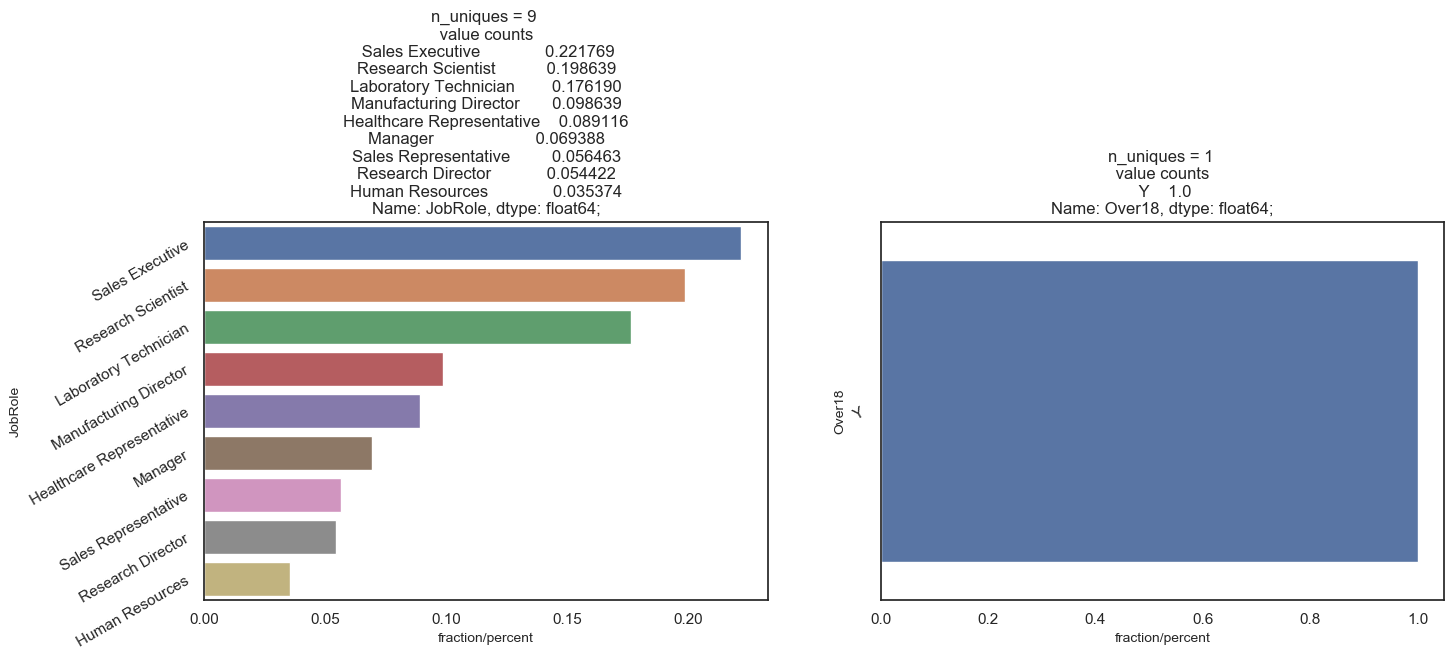

In [249]:
# seggregating variables into groups
categorical_cols1 = ['Attrition', 'BusinessTravel']
categorical_cols2 = ['Gender','MaritalStatus']
categorical_cols3 = ['EducationField', 'Department']
categorical_cols4 = ['JobRole', 'Over18']
UVA_category(data, categorical_cols1)
UVA_category(data, categorical_cols2)
UVA_category(data, categorical_cols3)
UVA_category(data, categorical_cols4)


## Univariate: Missing Values

In [250]:
# finding number of missing values in every variable
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Univariate Analysis: Outliers

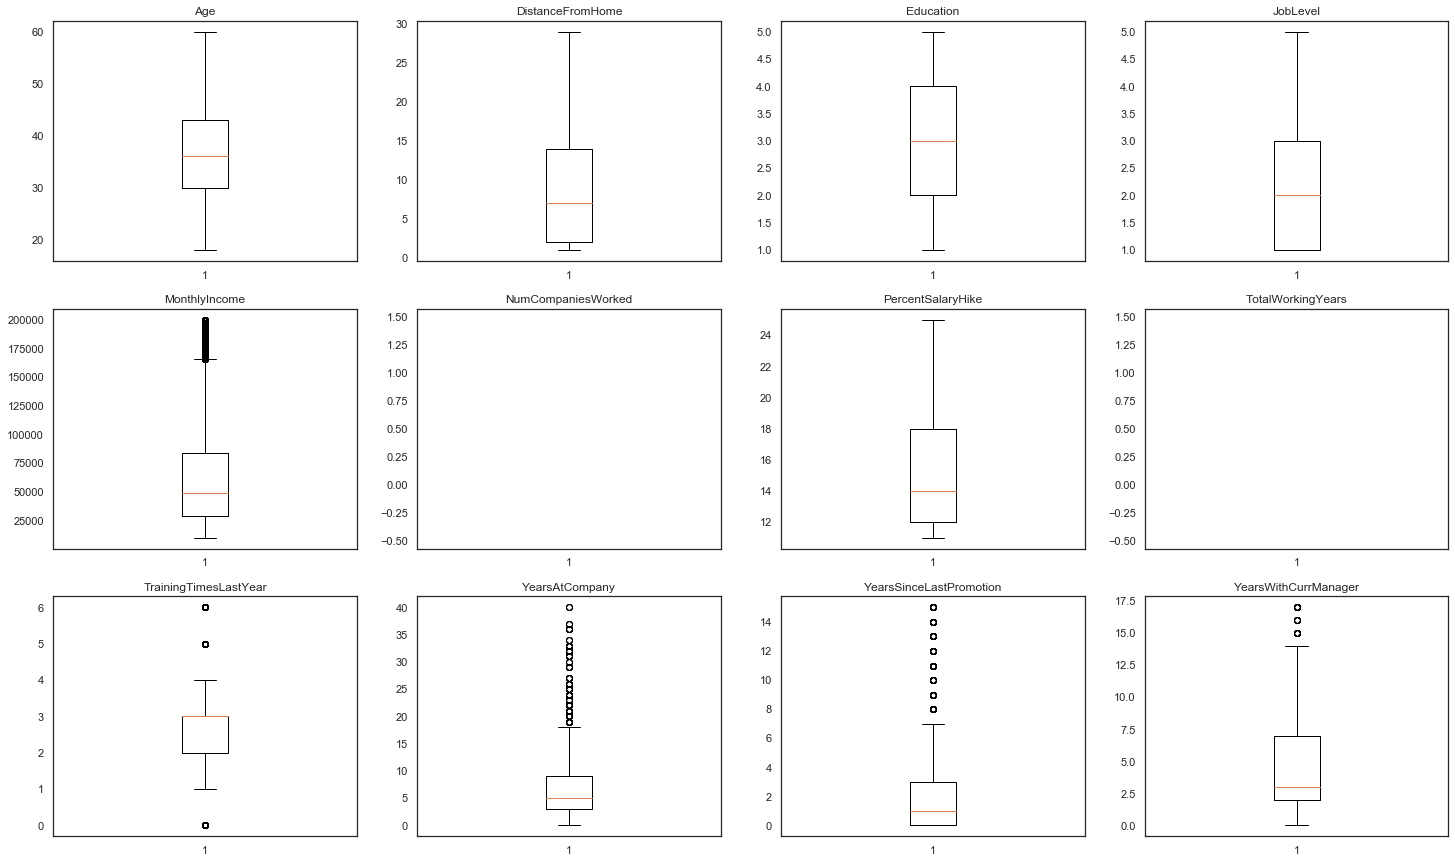

In [257]:
fig = plt.figure(figsize=(25,15))
for i, col in enumerate(ndata.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(ndata[col])
    plt.title(col)
plt.show()

## Bivariate Analysis

In [260]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Age                          int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
JobLevel                     int64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

### Correlation Matrix

In [261]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
DistanceFromHome,0.007376,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
JobLevel,-0.001137,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372
PercentSalaryHike,-0.032561,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Heatmap - Pearson

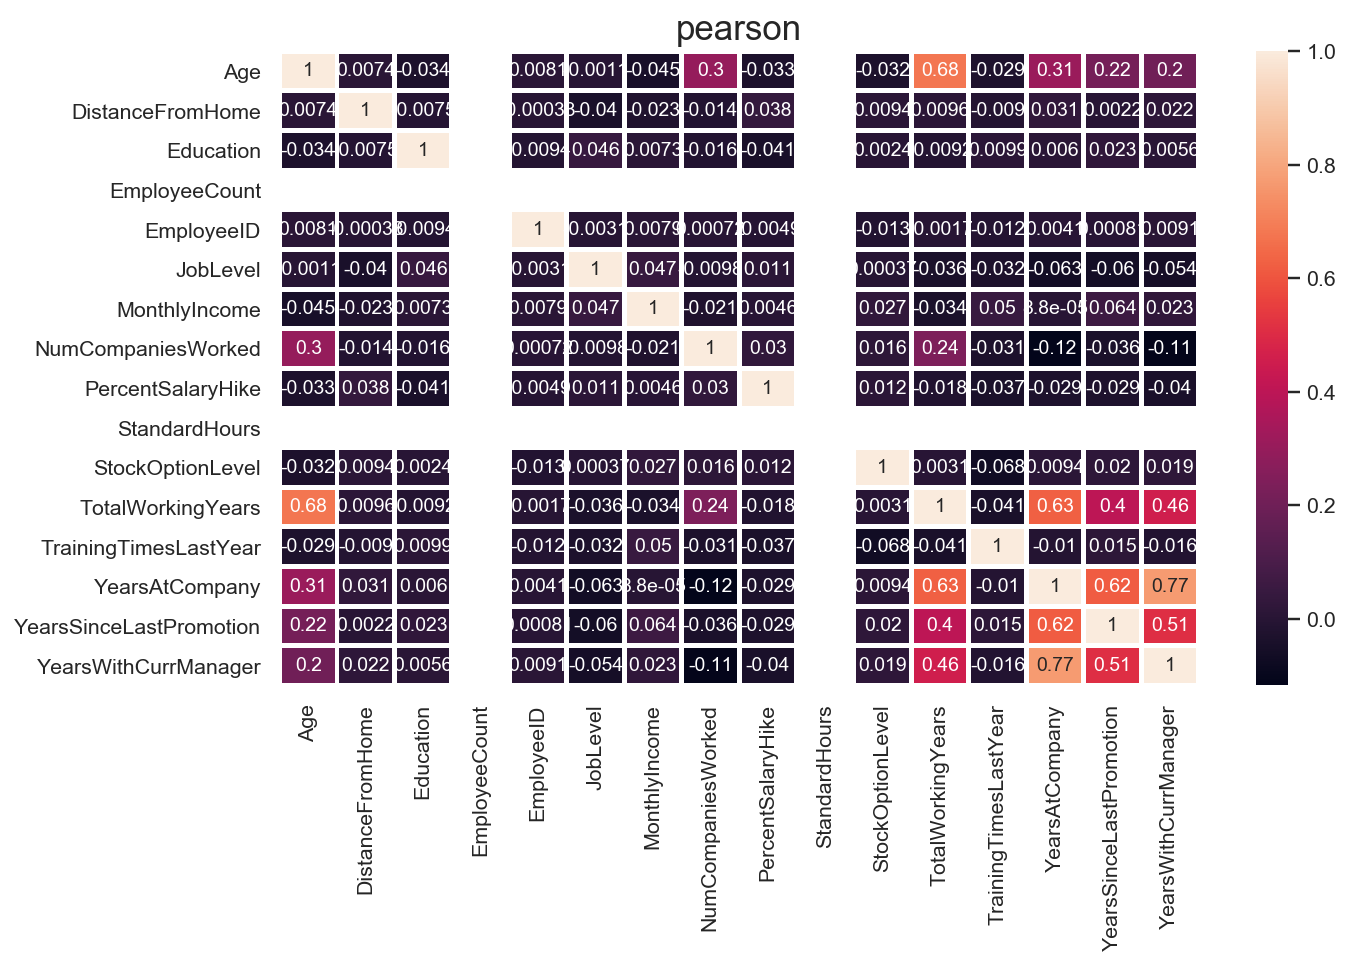

In [262]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot=True)
  plt.title(i, fontsize=18)



## Multivariate Analysis - Pair Plot

<Figure size 840x560 with 0 Axes>

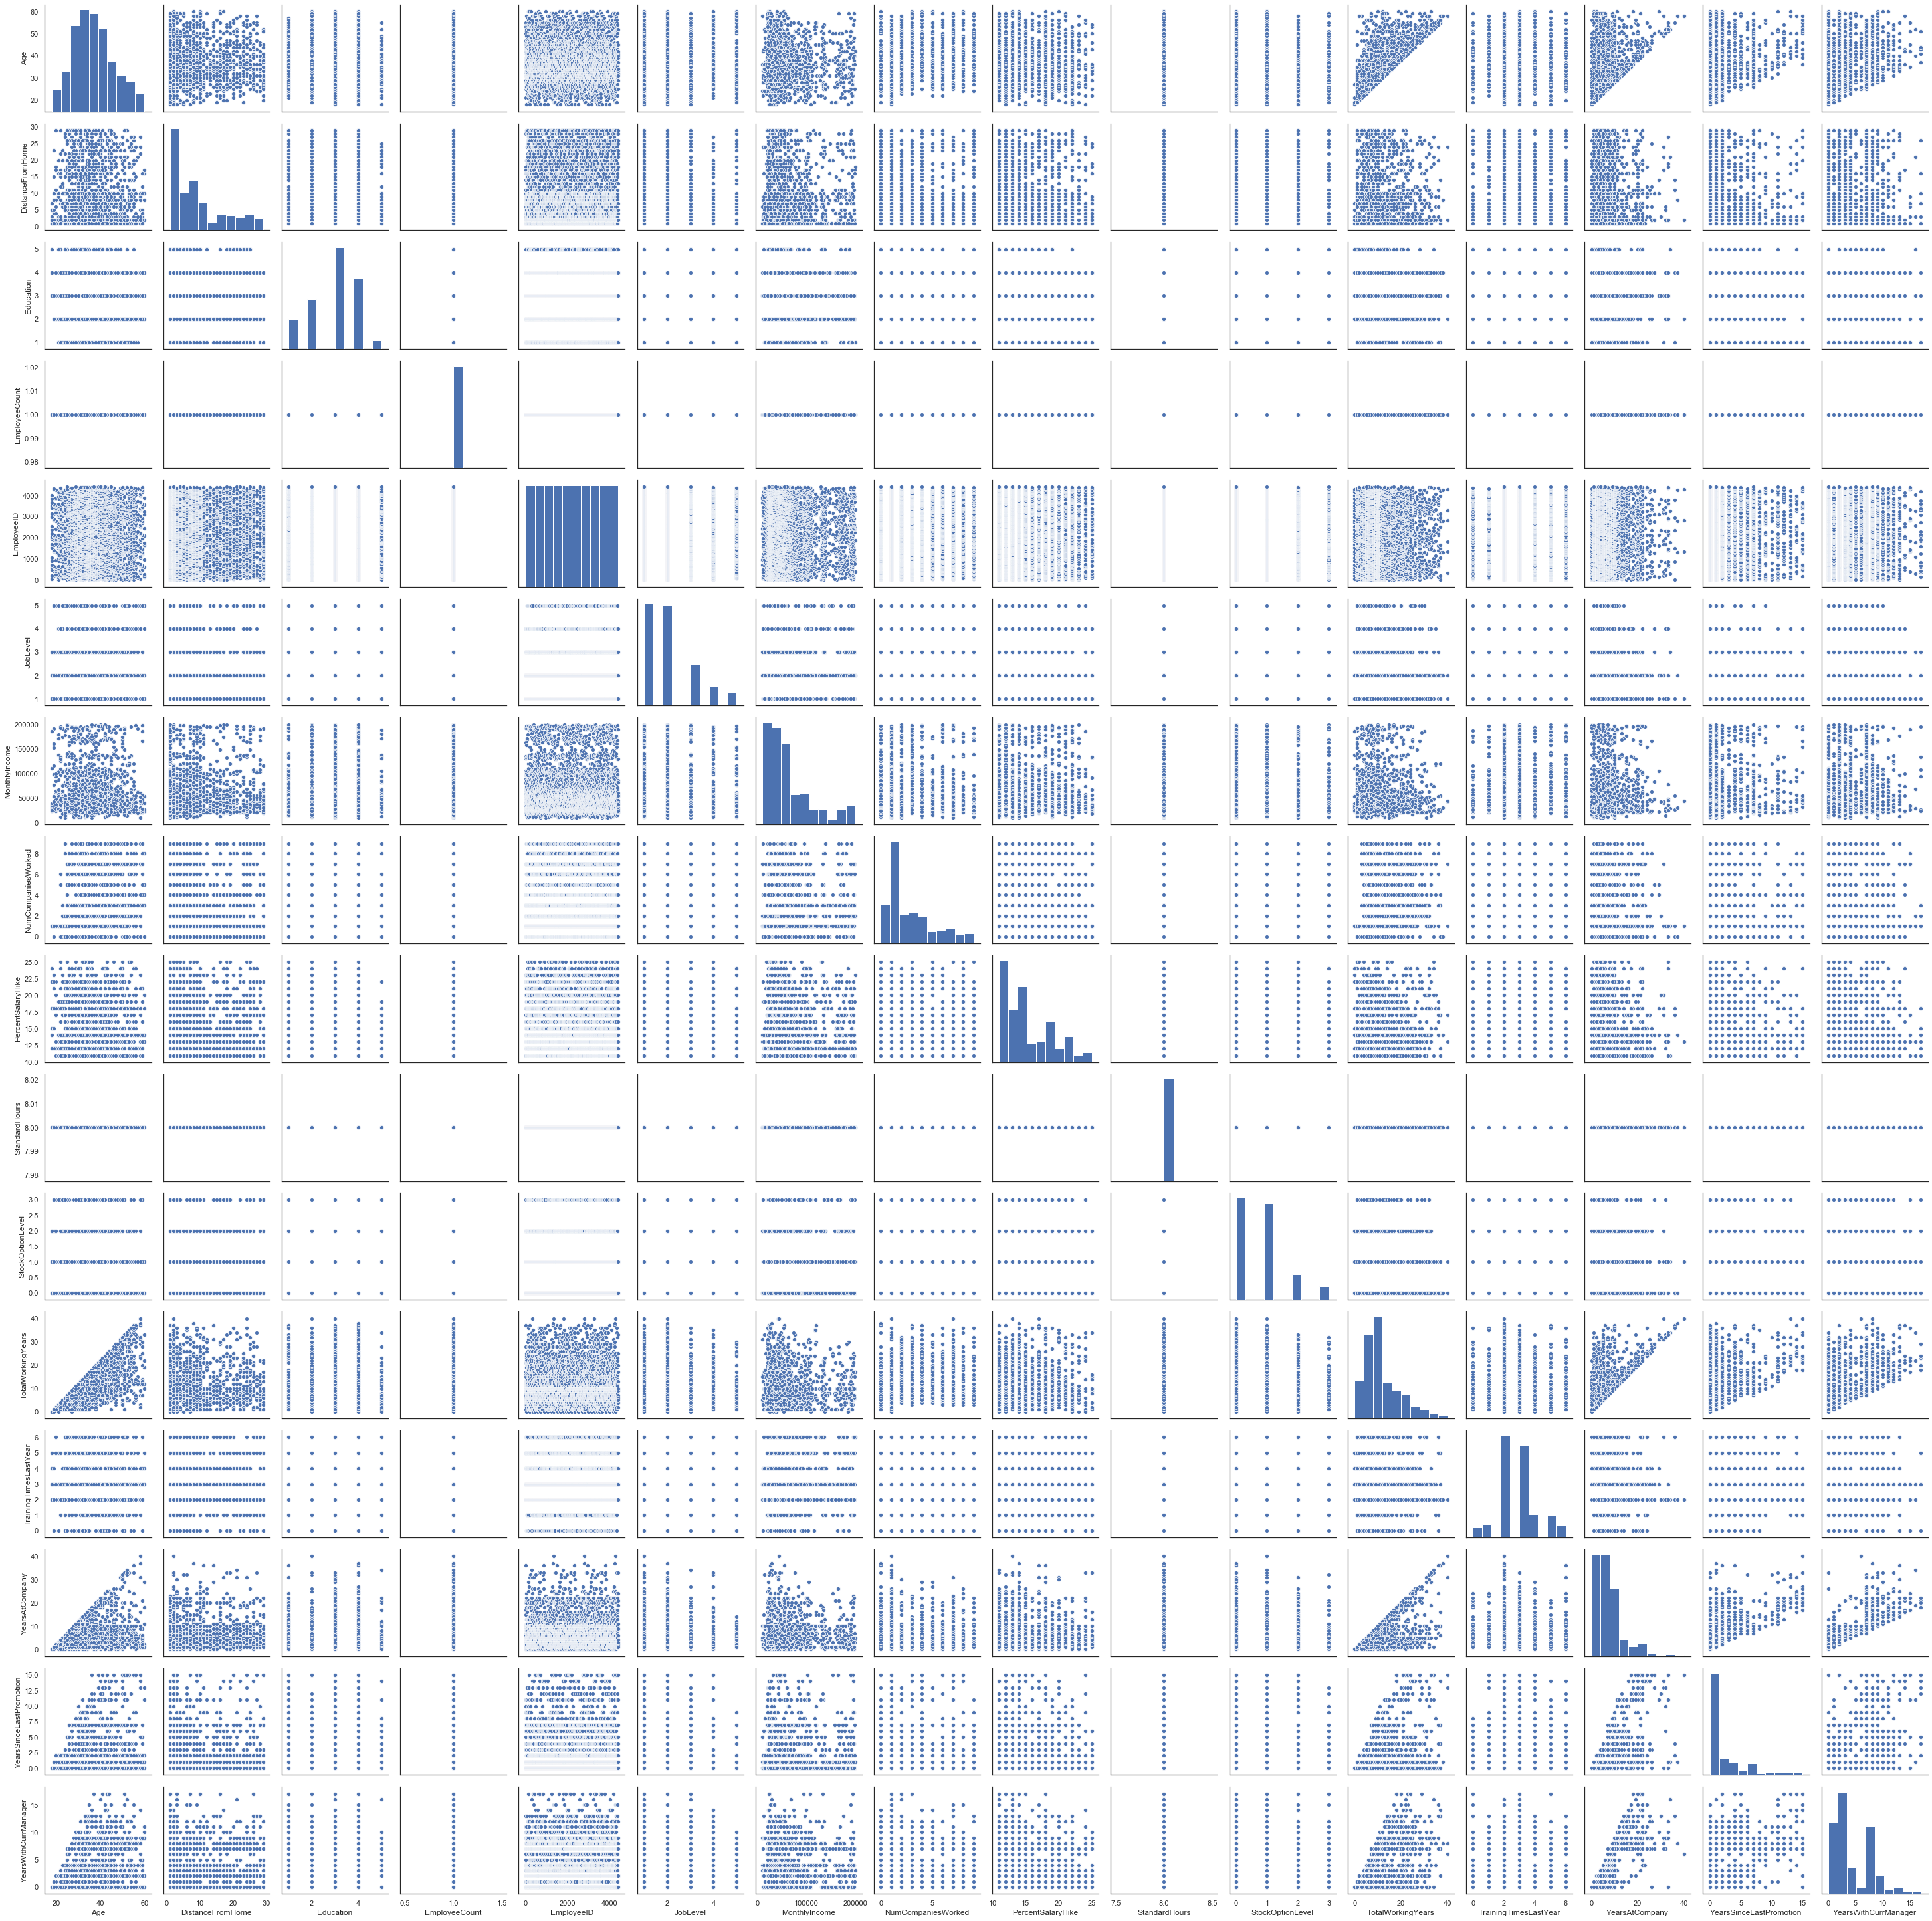

In [264]:
# scatter plot 
plt.figure(dpi=140)
sns.pairplot(numerical) 

## Statistical Test

In [266]:
st_data = data[['Attrition', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]

df_attr_yes = st_data[st_data.Attrition == 'Yes']
df_attr_no = st_data[st_data.Attrition == 'No']

display(df_attr_yes.head())
display(df_attr_no.head())

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
1,Yes,10,41890,6.0,5,4
6,Yes,11,58130,5.0,0,0
13,Yes,1,57620,10.0,10,9
28,Yes,1,103330,19.0,1,0
30,Yes,4,68540,5.0,3,2


,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4
5,No,8,40710,28.0,7,7


### MannWhitneyu Test

In [267]:
def mannWhitneyu(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = mannwhitneyu(df_temp1[col], df_temp2[col])
        print(stat, p)
        
        if p < 0.05:
            print(f'p value < than 0.05, H0 rejected\n')
        else:
            print(f'p value > than 0.05, the H0 is accepted\n')

mannWhitneyu(df_attr_yes, df_attr_no)

Attrition & DistanceFromHome
1312110.0 0.4629185205822659
p value > than 0.05, the H0 is accepted

Attrition & MonthlyIncome
1264900.5 0.053577283839938566
p value > than 0.05, the H0 is accepted

Attrition & TotalWorkingYears
909954.0 2.8897554531400447e-39
p value < than 0.05, H0 rejected

Attrition & YearsAtCompany
923238.0 6.047598261692858e-37
p value < than 0.05, H0 rejected

Attrition & YearsWithCurrManager
957253.5 1.2365483142169853e-31
p value < than 0.05, H0 rejected



### Pearsonr Test

In [268]:
def Pearsonr(df_pt):
    df_temp = df_pt.copy()
    df_temp.Attrition.replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)
    for col in df_pt.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = pearsonr(df_temp['Attrition'], df_pt[col])
        print(stat, p)
        
        if p < 0.05:
            print(f'p value < than 0.05, H0 rejected\n')
        else:
            print(f'p value > than 0.05, the H0 is accepted\n')

        

print('pearsonr:\n')
st_data.dropna(inplace=True)
Pearsonr(st_data)

pearsonr:

Attrition & DistanceFromHome
-0.00860869077159659 0.5680340915894816
p value > than 0.05, the H0 is accepted

Attrition & MonthlyIncome
-0.03021554015455629 0.045028497465691784
p value < than 0.05, H0 rejected

Attrition & TotalWorkingYears
-0.17033846317245488 5.241246810641933e-30
p value < than 0.05, H0 rejected

Attrition & YearsAtCompany
-0.13361591411199794 5.509399739538274e-19
p value < than 0.05, H0 rejected

Attrition & YearsWithCurrManager
-0.15560194569240235 2.962989017516574e-25
p value < than 0.05, H0 rejected



## Data Preprocessing

In [269]:
ccols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18']
st_data.Attrition.replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)
st_data

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,0,6,131160,1.0,1,0
1,1,10,41890,6.0,5,4
2,0,17,193280,5.0,5,3
3,0,2,83210,13.0,8,5
4,0,10,23420,9.0,6,4
...,...,...,...,...,...,...
4404,0,4,35390,6.0,6,5
4405,0,5,60290,10.0,3,2
4406,0,2,26790,10.0,3,2
4407,0,25,37020,5.0,4,2


### Label encoding

In [222]:
dummy_data = data.copy()

df_dummies = pd.get_dummies(dummy_data,columns = ccols)

df_dummies.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dire

### Scaling

In [270]:
min_max_scaler = MinMaxScaler()
df_scale = pd.DataFrame(min_max_scaler.fit_transform(df_dummies))
df_scale.columns = df_dummies.columns
df_scale
correlation = df_scale.dropna().corr()
correlation

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
Age,1.000000,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,...,0.009455,-0.000203,-0.014490,0.006263,0.008286,-0.012545,0.031866,0.085214,-0.119313,NaN
DistanceFromHome,0.007376,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,...,-0.038583,-0.000888,-0.001639,-0.004057,-0.011917,0.006000,0.001829,0.038692,-0.042932,NaN
Education,-0.033900,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,...,0.044398,-0.013795,0.047038,0.001905,-0.004584,0.033437,-0.017166,-0.007208,0.022964,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,...,-0.002574,0.016731,-0.001672,-0.004858,0.001610,0.007872,-0.000656,-0.000688,0.001318,NaN
JobLevel,-0.001137,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,...,0.025550,-0.003758,0.031798,0.014099,-0.020489,-0.024847,0.015417,0.009010,-0.023332,NaN
MonthlyIncome,-0.045163,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,...,-0.009595,0.029240,0.003006,-0.001413,0.001682,0.003193,0.034052,0.019745,-0.051368,NaN
NumCompaniesWorked,0.299527,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,...,-0.005549,0.002330,0.013206,-0.019579,-0.020421,0.013675,0.042589,-0.016035,-0.020767,NaN
PercentSalaryHike,-0.032561,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,...,-0.002753,-0.017688,-0.007691,-0.009469,-0.041851,0.062847,0.004605,-0.017101,0.014159,NaN
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Pearson')

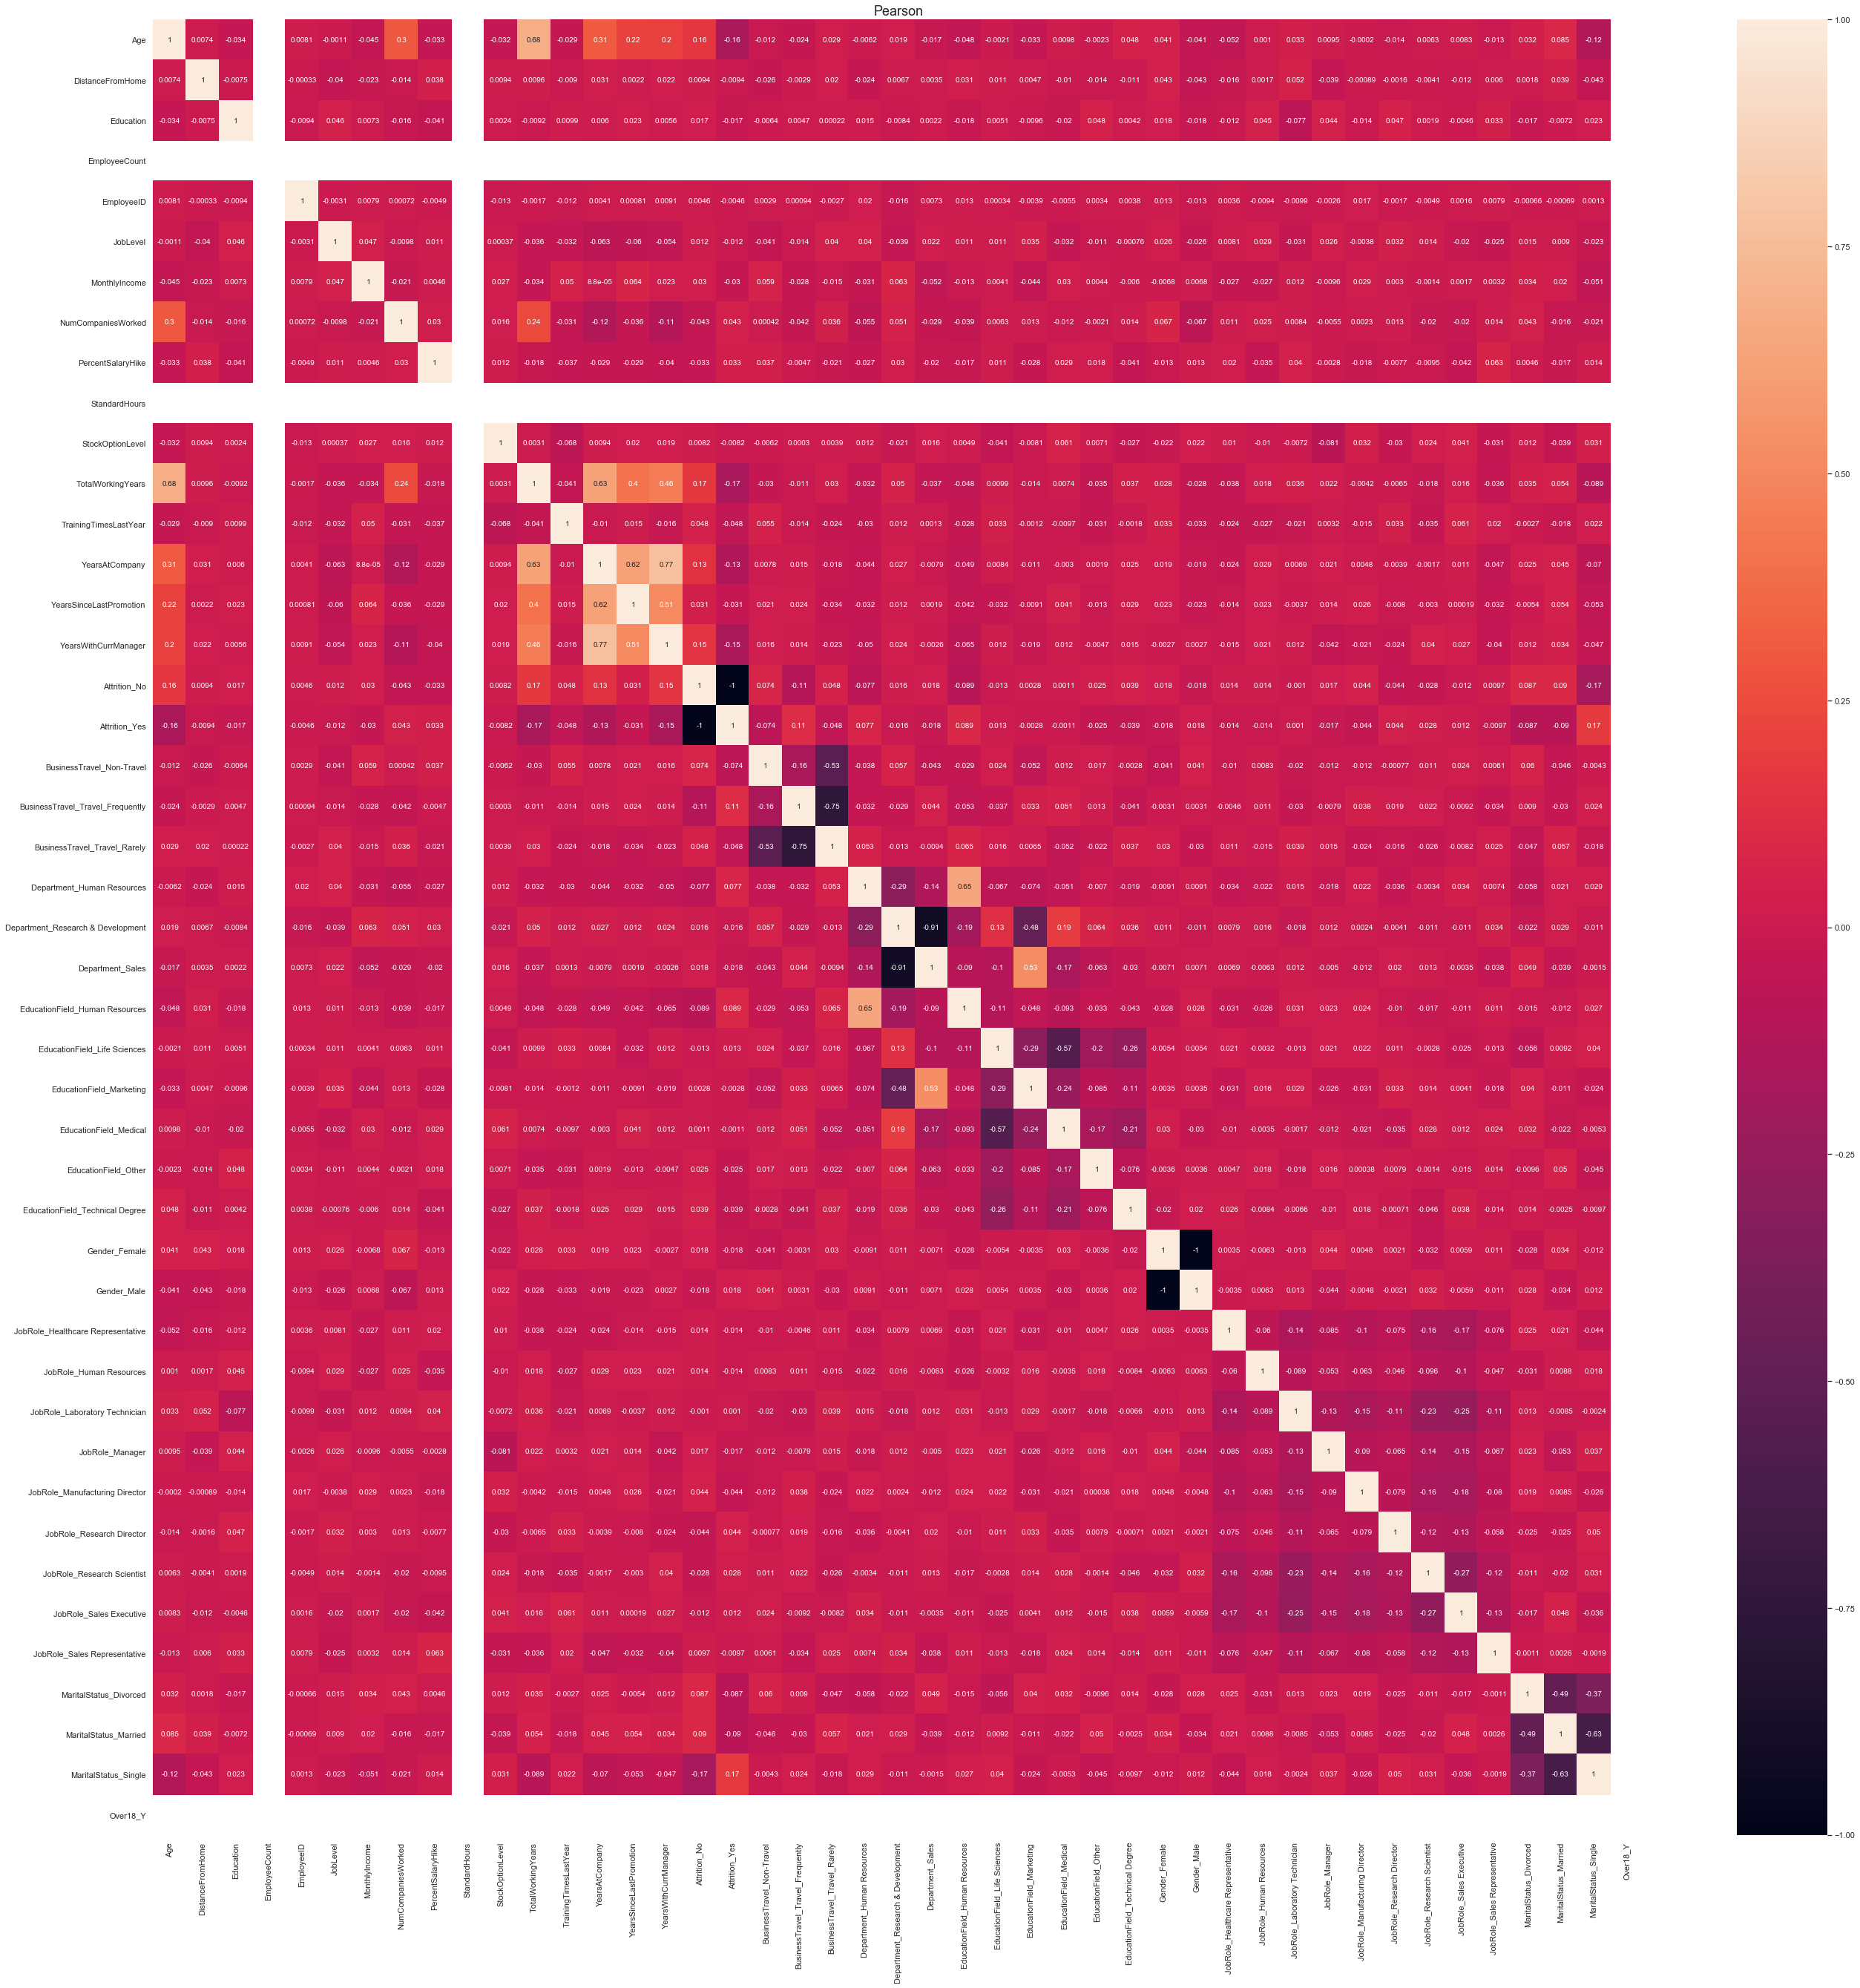

In [271]:
# plotting heatmap using all methods for all numerical variables
x, y = len(df_scale.columns), len(df_scale.columns)
fig, ax = plt.subplots(figsize=(x, y))  
correlation = df_dummies.dropna().corr()
sns.heatmap(correlation, ax = ax, annot = True)  
plt.title('Pearson', fontsize=18)

Inference:

From the above tests we can know that 

employees with less number of years in company, with current manager and less work experience leave the company more
employees who are single leaves the company more.
employees traveling frequently leaves the company more.
employee in HR department leave the company more.


## End of the Case Study
